# 1.) Overview

In [46]:
import pandas as pd
from pytz import utc
from datetime import datetime
import math
import numpy as np

In [2]:
data_reviews = pd.read_csv("reviews.csv",parse_dates=['Timestamp'])

In [3]:
data_reviews.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [4]:
data_reviews.shape

(45000, 4)

In [23]:
data_reviews['Course Name'].unique()

array(['The Python Mega Course: Build 10 Real World Applications',
       'The Complete Python Course: Build 10 Professional OOP Apps',
       '100 Python Exercises I: Evaluate and Improve Your Skills',
       'Interactive Data Visualization with Python and Bokeh',
       'Python for Beginners with Examples',
       'Data Processing with Python',
       '100 Python Exercises II: Evaluate and Improve Your Skills',
       'Learn GIS in One Hour'], dtype=object)

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

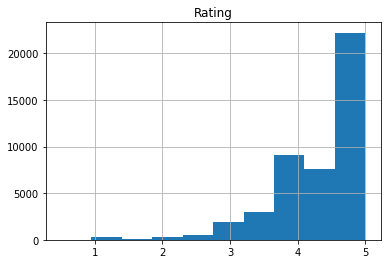

In [20]:
data_reviews.hist(column='Rating')

# 2.) Selecting data from the dataframe

#### Selecting column

In [7]:
mean_rating = data_reviews['Rating'].mean()
mean_rating

4.442155555555556

In [8]:
median_rating = data_reviews["Rating"].median()
median_rating

4.5

#### Selecting multiple columns

In [9]:
two_columns = data_reviews[['Course Name', 'Rating']]
two_columns.head()

,Course Name,Rating
0,The Python Mega Course: Build 10 Real World Ap...,4.0
1,The Python Mega Course: Build 10 Real World Ap...,4.0
2,The Python Mega Course: Build 10 Real World Ap...,4.0
3,The Python Mega Course: Build 10 Real World Ap...,5.0
4,The Python Mega Course: Build 10 Real World Ap...,4.5


#### Selecting row

In [10]:
single_row = data_reviews.iloc[3]
single_row

Course Name    The Python Mega Course: Build 10 Real World Ap...
Timestamp                              2021-04-02 03:33:24+00:00
Rating                                                       5.0
Comment                                                      NaN
Name: 3, dtype: object

#### Selecting multiple rows

In [28]:
#multiple_rows = data_reviews.iloc[[1,4,8,9]]
multiple_rows = data_reviews.iloc[1:4]
multiple_rows

,Course Name,Timestamp,Rating,Comment
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN


#### Selecting a specifc cell

In [12]:
cell = data_reviews['Timestamp'].iloc[3]
cell

Timestamp('2021-04-02 03:33:24+0000', tz='UTC')

In [13]:
cell_2 = data_reviews.at[3,'Timestamp']
cell_2

Timestamp('2021-04-02 03:33:24+0000', tz='UTC')

# 3.) Filtering data based on conditions

#### One condition

In [14]:
positive_reviews = data_reviews[data_reviews['Rating'] >= 4 ].count()
positive_reviews

Course Name    38873
Timestamp      38873
Rating         38873
Comment         5911
dtype: int64

In [15]:
percantage_comments = positive_reviews['Comment'] / (positive_reviews['Course Name']/100)
percantage_comments

15.20592699302858

#### Multiple Conditions

In [16]:
course_name = 'Data Processing with Python'

In [30]:
df_data_procesessing = data_reviews[(data_reviews['Rating'] > 4) & (data_reviews['Course Name'] == course_name)]
df_data_procesessing

,Course Name,Timestamp,Rating,Comment
121,Data Processing with Python,2021-03-29 11:16:36+00:00,5.0,NaN
214,Data Processing with Python,2021-03-25 15:17:11+00:00,5.0,NaN
367,Data Processing with Python,2021-03-20 14:58:40+00:00,5.0,NaN
396,Data Processing with Python,2021-03-19 11:46:46+00:00,4.5,NaN
1005,Data Processing with Python,2021-02-26 10:25:30+00:00,5.0,NaN
...,...,...,...,...
44660,Data Processing with Python,2018-01-07 22:23:21+00:00,5.0,NaN
44715,Data Processing with Python,2018-01-06 19:40:30+00:00,5.0,"Concise and neat, covered important practices...."
44806,Data Processing with Python,2018-01-04 22:39:42+00:00,5.0,NaN
44954,Data Processing with Python,2018-01-01 23:36:07+00:00,4.5,might have had a mac installation tutorial also


In [18]:
rating = df_data_procesessing['Rating'].mean()
rating

4.842741935483871

# 4.) Filtering my dates

In [19]:
year_2020 = data_reviews[
    (data_reviews['Timestamp'] > datetime(2018,12,31, tzinfo=utc)) &
    (data_reviews['Timestamp'] < datetime(2021,6,30, tzinfo = utc)) &
    (data_reviews['Rating'] < 3) 
    #& (type(data_reviews['Comment']) is float)
]


year_2020

,Course Name,Timestamp,Rating,Comment
57,The Python Mega Course: Build 10 Real World Ap...,2021-03-31 08:41:48+00:00,2.0,Coding is awful confusing. Loads of weird stuf...
64,The Python Mega Course: Build 10 Real World Ap...,2021-03-31 05:50:51+00:00,2.5,NaN
103,100 Python Exercises I: Evaluate and Improve Y...,2021-03-29 19:21:12+00:00,1.0,NaN
115,The Python Mega Course: Build 10 Real World Ap...,2021-03-29 13:25:50+00:00,1.0,NaN
162,The Complete Python Course: Build 10 Professio...,2021-03-27 13:30:15+00:00,1.0,NaN
...,...,...,...,...
30828,The Python Mega Course: Build 10 Real World Ap...,2019-01-03 07:52:04+00:00,1.5,NaN
30849,The Python Mega Course: Build 10 Real World Ap...,2019-01-02 22:04:13+00:00,2.0,NaN
30877,Python for Beginners with Examples,2019-01-02 08:51:22+00:00,2.0,NaN
30907,The Python Mega Course: Build 10 Real World Ap...,2019-01-01 15:49:27+00:00,2.5,NaN


# Data analysis

In [37]:
data_reviews.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [38]:
print(data_reviews.shape)

(45000, 4)


### Average rating

In [40]:
average_rating = data_reviews['Rating'].mean()
average_rating

4.442155555555556

In [50]:
unique_course_arr = data_reviews['Course Name'].unique()
#unique_course is numpy array -> converting it to a list object:

unique_course = unique_course_arr.tolist()

for course in unique_course:
    avg_rating = (data_reviews[data_reviews['Course Name'] == course]).mean()
    print(f"The course: {course}, has average rating: {avg_rating}")

<ipython-input-50-a0ecace00e07>:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  avg_rating = (data_reviews[data_reviews['Course Name'] == course]).mean()


The course: The Python Mega Course: Build 10 Real World Applications, has average rating: Rating    4.47727
dtype: float64
The course: The Complete Python Course: Build 10 Professional OOP Apps, has average rating: Rating    4.623404
dtype: float64
The course: 100 Python Exercises I: Evaluate and Improve Your Skills, has average rating: Rating    4.323603
dtype: float64
The course: Interactive Data Visualization with Python and Bokeh, has average rating: Rating    4.275098
dtype: float64
The course: Python for Beginners with Examples, has average rating: Rating    4.300975
dtype: float64
The course: Data Processing with Python, has average rating: Rating    4.237327
dtype: float64
The course: 100 Python Exercises II: Evaluate and Improve Your Skills, has average rating: Rating    4.519643
dtype: float64
The course: Learn GIS in One Hour, has average rating: Rating    4.071142
dtype: float64


### Average rating for the highest reviewed course

In [58]:
highest_score = data_reviews[data_reviews['Course Name'] == 'The Complete Python Course: Build 10 Professional OOP Apps']['Rating'].mean()
highest_score

4.623404255319149

### Average rating for particular period

In [62]:
#2019 - 2020
avg_rating_one_year = data_reviews[(data_reviews['Course Name'] == 'The Python Mega Course: Build 10 Real World Applications') & 
                                   (data_reviews['Timestamp'] > datetime(2018,12,31,tzinfo = utc)) &
                                    (data_reviews['Timestamp'] <= datetime(2019,12,31,tzinfo = utc))
                                  ]['Rating'].mean()
avg_rating_one_year

4.455367847411444

### Average ratings of commented and uncommented reviews

In [72]:
avg_commented = data_reviews[data_reviews['Comment'].notnull()]['Rating'].mean()
avg_commented

4.489777908515959

In [75]:
avg_uncommented = data_reviews[data_reviews['Comment'].isnull()]['Rating'].mean()
avg_uncommented

4.433679746603492

In [76]:
# Average rating of commented reviews is higher than uncommented

### Number of uncommented reviews

In [78]:
uncommented_rev = len(data_reviews[data_reviews['Comment'].isnull()])
uncommented_rev

38201

In [83]:
commented_rev = data_reviews[data_reviews['Comment'].notnull()]['Course Name'].count()
commented_rev

6799

### Reviews containing a specific word

In [98]:
# word: accent
accent = data_reviews[(data_reviews['Comment'].notnull())&
             (data_reviews['Comment'].str.contains('accent'))
            ]
for i in accent['Comment']:
    print(f"")
    print(f"{i}\n")
    print


The course is great but because of the instructor's accent, the subtitles are terrible.


Sometimes it is difficult to understand the instructor's accent. So far I am not sure if there is enough depth, but that could change


A little trouble at first with the accent, but I adjusted quickly. Overall I like his honesty and willingness to talk about errors


I was looking for some time for the good Python course for beginners and I wanted to find something with real projects in it. After checking the contents and reviews of the courses I decided to choose this course. First I was concerned about the strange accent of the trainer but after few lectures, I got used to it and it's actually really clear English. Way that Ardit is explaining things is really clear, he is also going forward in quite slow tempo at the beginning which is good, later on he is speeding up and so does the knowledge of the student as well. Don't skip the basics -section at the beginning even if you pass the test. T

### Average comment rating with a specific word

In [106]:
# word: accent
tst = data_reviews[data_reviews['Comment'].str.contains('accent',na=False)]['Rating'].mean()
tst

3.8636363636363638